# **Part-1: Data loading and cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("supermarket sales Sheet1 (1).csv")

In [ ]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


**Now we have to take look at data types and null values count using pandas info function**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    1000
dtype: int64

**There is no duplicate and null values with in the dataframe and also change datatypes**

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


In [ ]:
df['Time']=pd.to_datetime(df['Time'])
print(df['Time'].dtype)

datetime64[ns]


# **PART-2**

## **1.Is your supermarket more popular with males or females?**

In [ ]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

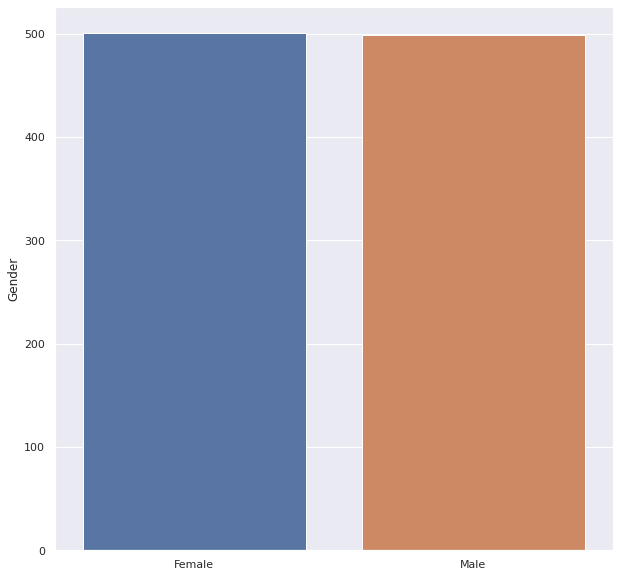

In [ ]:
#sns.catplot(x='Gender',kind='count',data=df)
gendr_values=df['Gender'].value_counts()
gendr_labels=['Female','Male']
sns.barplot(x=gendr_labels,y=gendr_values,data=df)

**Female, Male counts are almost same.so store is popular with both male and female**

## **2. What does the customer rating look like and can you also comment on its skewness?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


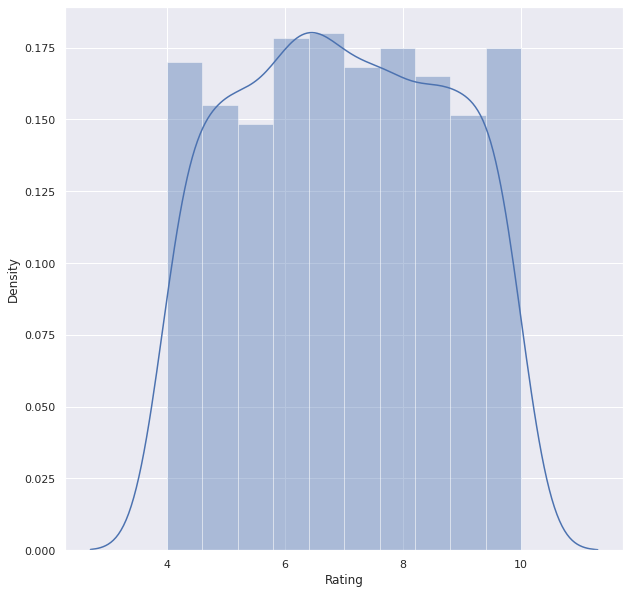

In [ ]:
sns.distplot(df['Rating'])

**Above Distribution seems to be almost uniform with a slight deviation from normal.now lets look at its skewness**

In [ ]:
df['Rating'].skew()

0.00900964876573073

**Skewness of 0.009 is very low and  the distribution is said to be unskewed**

## **3.What can you say about the aggregate sales across the branches?**

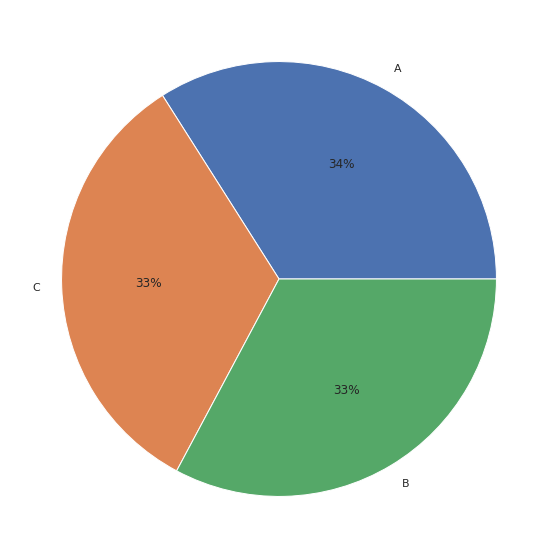

In [ ]:
from matplotlib import figure
#sns.boxplot(df['Branch'],df['Total'])
plt.pie(df['Branch'].value_counts(),labels=df['Branch'].unique(),autopct='%.0f%%')
plt.show()

**It seems to be all branches who's sales are almost same and performing well**

##**4. Which is the most popular payment method used by customers?**

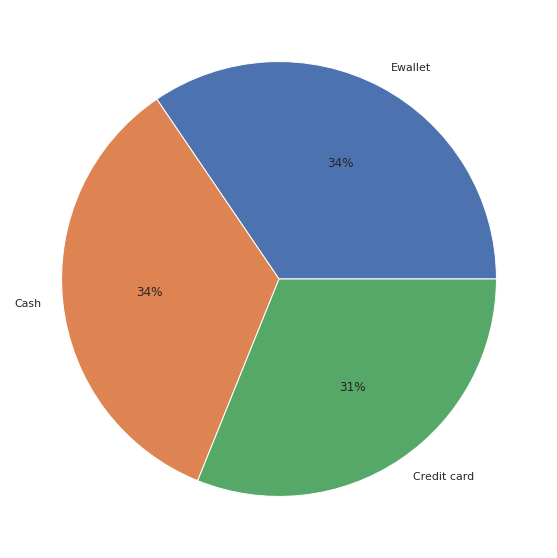

In [ ]:
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].unique(),autopct='%.0f%%')
plt.show()

**Here Cash, Ewallet payment methods are mostly used**

# **part-3:**

## **1.Does gross income affect customer ratings?**

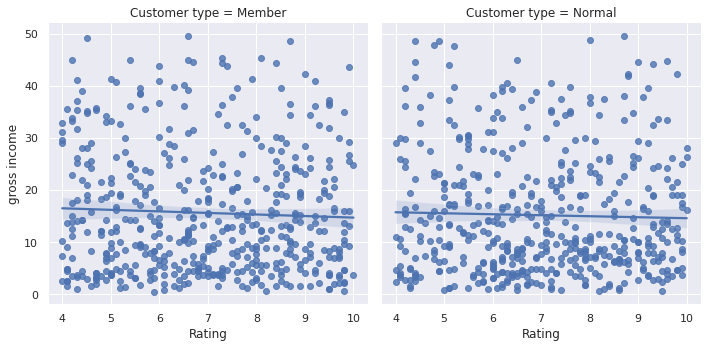

In [ ]:
	

sns.lmplot(x='Rating',y='gross income',col='Customer type',data=df)

**In above lmplot drew a linear model approximatly on data points.This means gross income does not affect customer ratings?**

## **2.Which is the most profitable branch?**

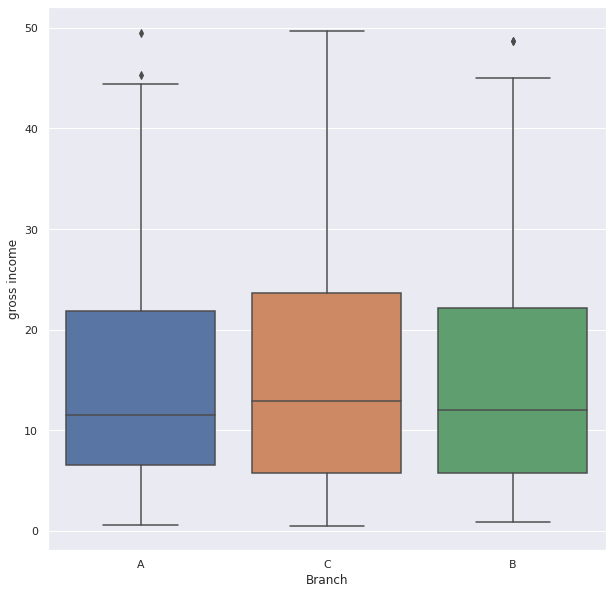

In [ ]:
sns.boxplot(x='Branch',y='gross income',data=df)

**Above boxplot gives data tendencies like mean, IQR, outliers and its clearly shows Most profitable is Branch-c**

## **3.How is the relationship between Gender and Gross income?**

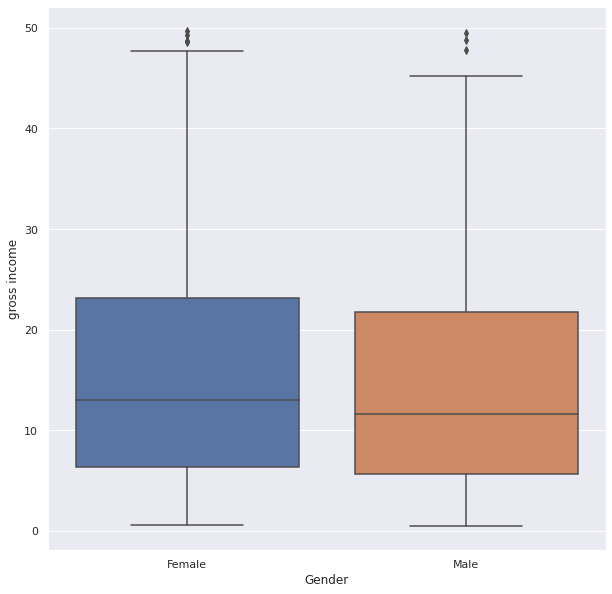

In [ ]:
sns.boxplot(x='Gender',y='gross income',data=df)

**Gross income is similar for both male and female but there is a slightly higher mean in female**

## **4.Can you see any time trend in gross income?**

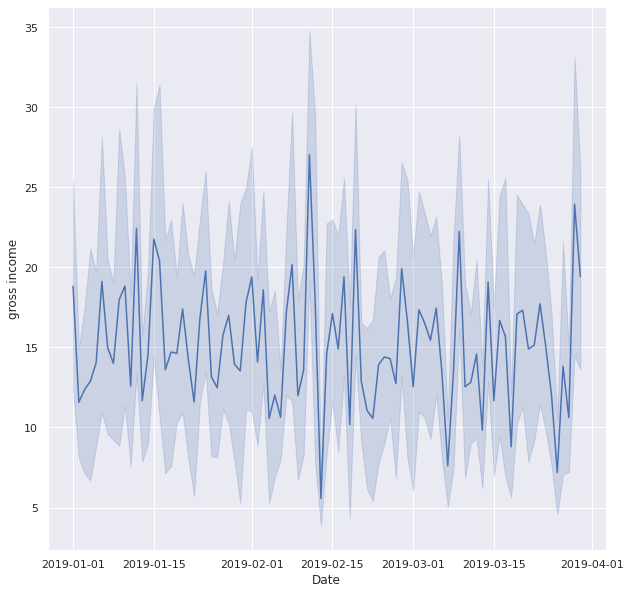

In [ ]:
sns.lineplot(x='Date',y='gross income',data=df)

**There is no certain trend in above line plot. income generated depending on time series**

## **5.Which product line helps you generate the most income?**

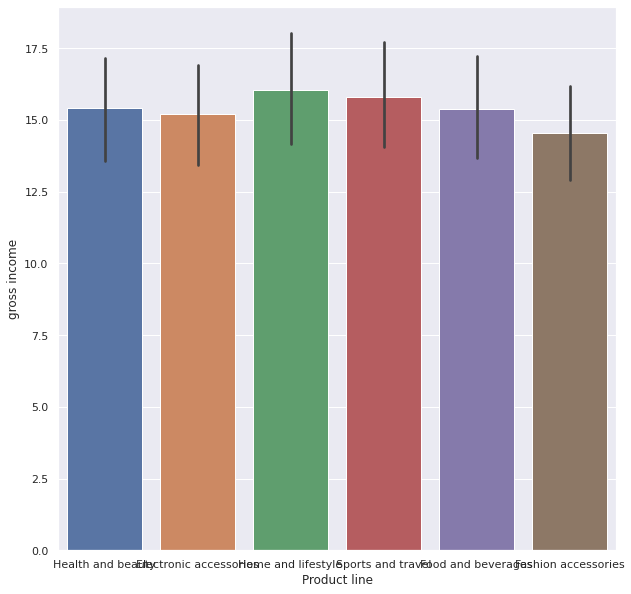

In [ ]:
sns.barplot(x='Product line',y='gross income',data=df)
sns.set(rc={'figure.figsize':(10,10)})

**Home and lifestyle has highest mean in income and others sports and travel,food and bevarages income also good**

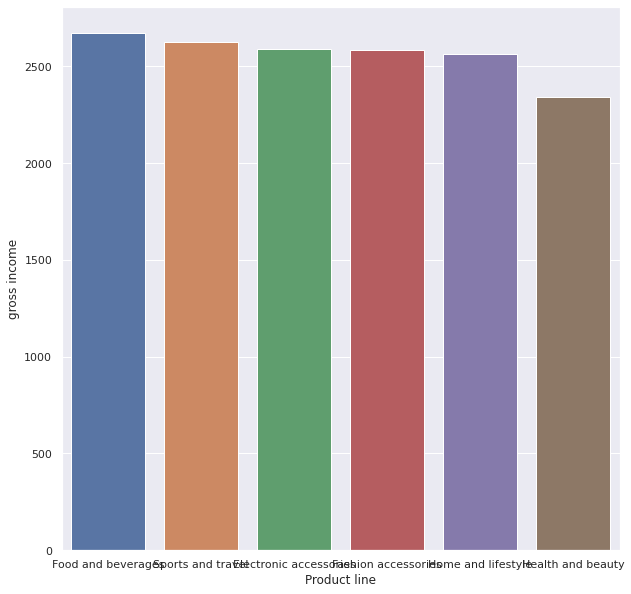

In [ ]:
totalcat=df[['Product line','gross income']].groupby(['Product line'],as_index=False).sum().sort_values(by='gross income',ascending=False)
sns.barplot(x='Product line',y='gross income',data=totalcat)

In [ ]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

**from above plot, according to the total calculation food and bevarages has highest, Sports and travel,Electronic accessories also have generates good gross income**

## **6.What is the spending pattern of both males and females, meaning in which category do they spend more?**

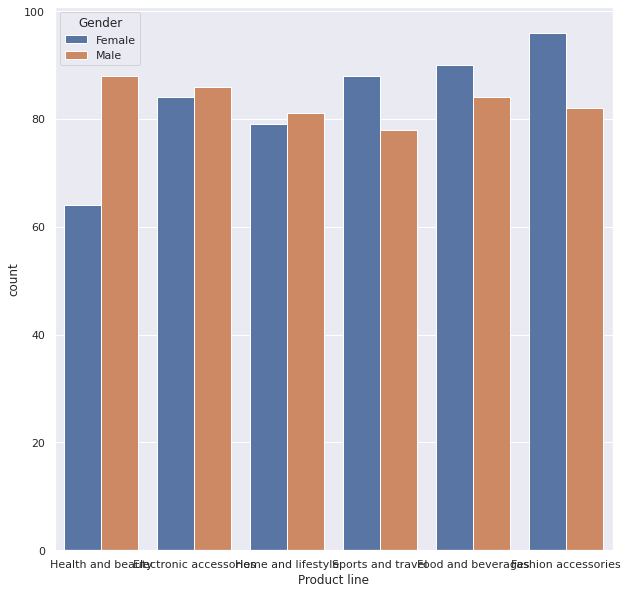

In [ ]:
sns.countplot(x=df['Product line'],hue=df['Gender'])

**Males spend more in Health and beauty , Females spend more in Fashion and accessories and also spend in food and bevarges as second highest category**

## **7.How many products are bought by customers?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


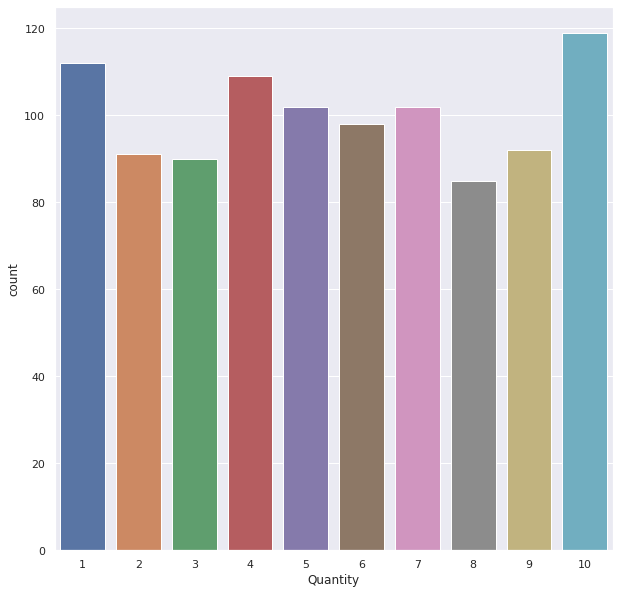

In [ ]:
sns.countplot(df['Quantity'])


**From above plot 10 items mostly brought by customers**

## **8.Which day of the week has maximum sales?**

In [ ]:
df['day']=df['Date'].dt.day_name()
df['day'].head(2)

0    Saturday
1      Friday
Name: day, dtype: object

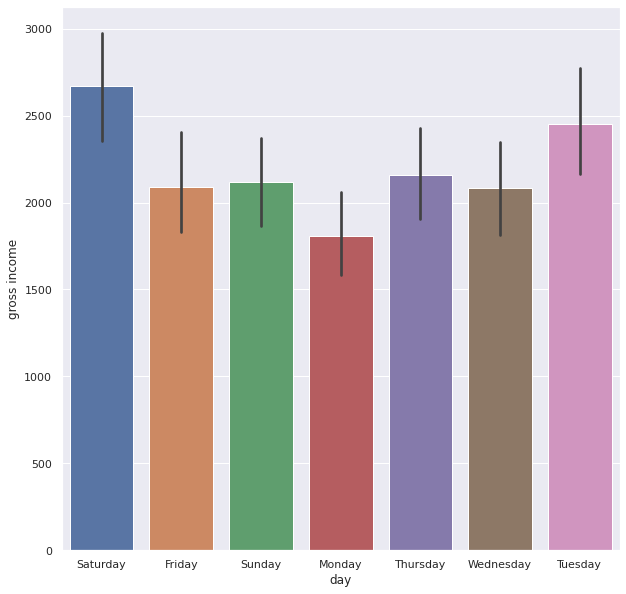

In [ ]:
sns.barplot(x='day', y='gross income', data=df,estimator=sum)

**Saturday has maximum sales**

## **9.Which hour of the day is busiest?**

In [ ]:
df['hour']=df['Time'].dt.hour
hourly=df['hour'].value_counts().reset_index()
hourly.head(2)

,index,hour
0,19,113
1,13,103


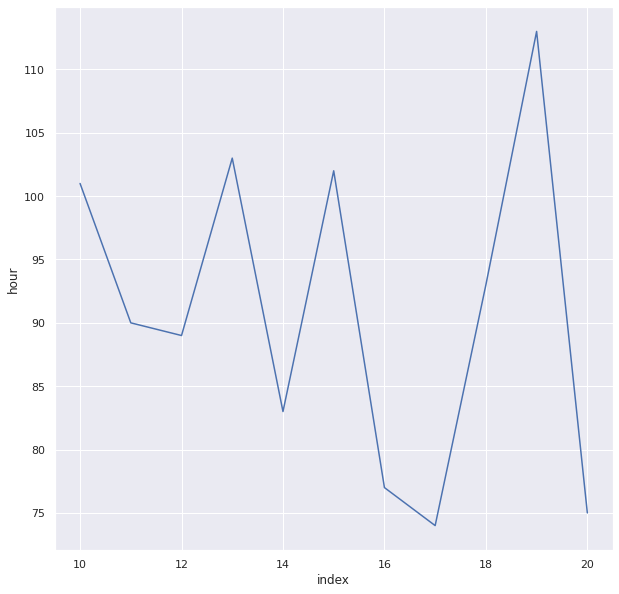

In [ ]:
sns.lineplot(x='index', y='hour', data=hourly)

**Busiest hour of the day is 19, that means 7pm**

## **10.Which product line should the supermarket focus on?**

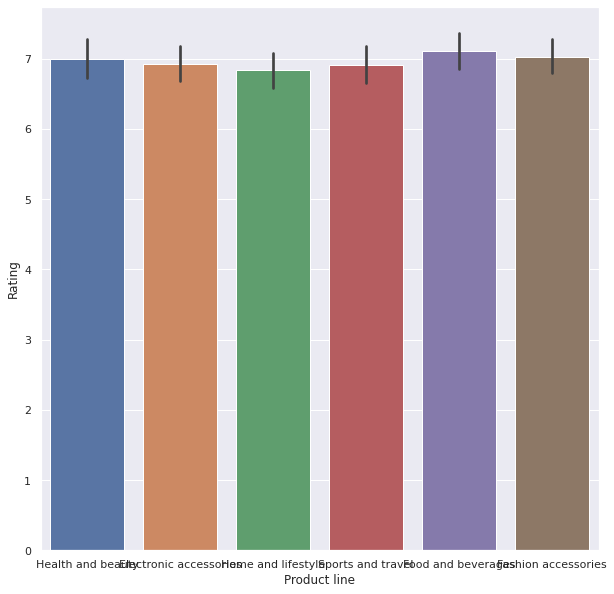

In [ ]:
sns.barplot(x='Product line',y='Rating',data=df)

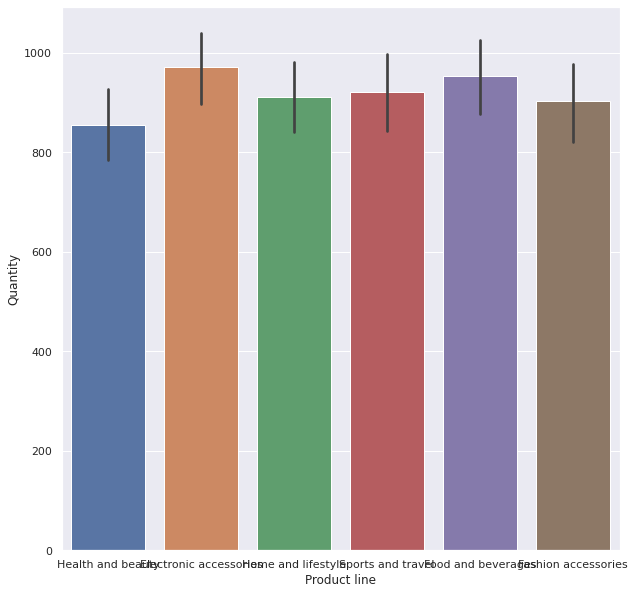

In [ ]:
sns.barplot(x='Product line', y='Quantity', data=df,estimator=sum)

**From ratings we have food and bevarages, fashion acessories has highest. but according to quantity we have electronic accessories,  food and bevarages has highest sales on product line**

## **11.Which city should be chosen for expansion and which products should it focus on?**

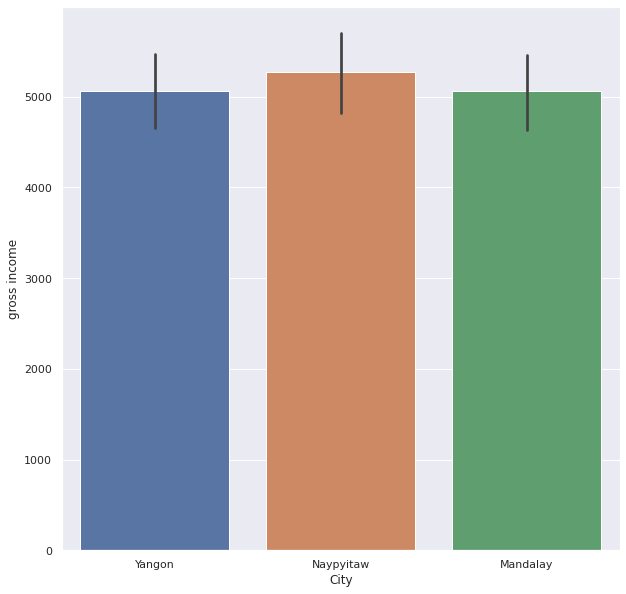

In [ ]:
sns.barplot(x='City', y='gross income', data=df,estimator=sum)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


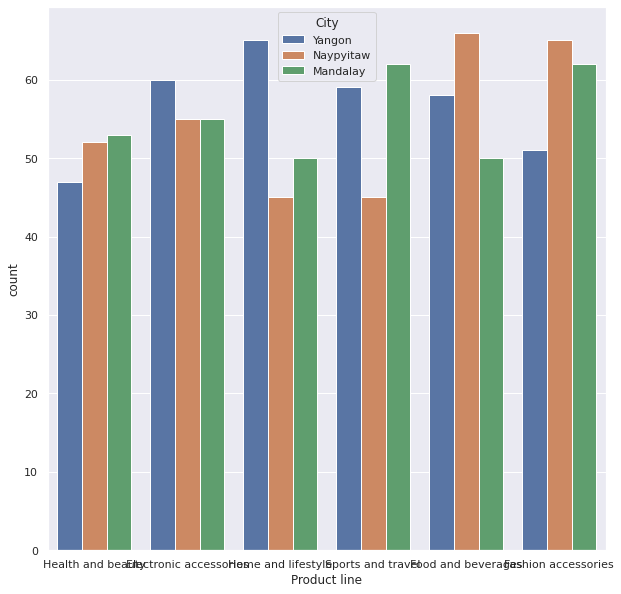

In [ ]:
sns.countplot(df['Product line'],hue=df['City'])
plt.show()

**food and bevarages,fashion accessories are almost high growth in two products compare to other.**